In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
df = pd.read_csv("train.csv")
df.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [5]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

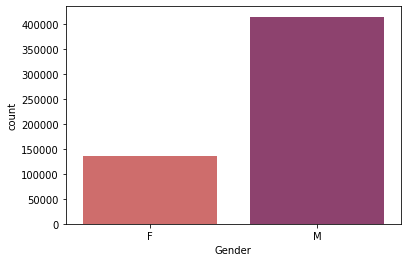

In [6]:
sns.countplot(data = df, x = "Gender", palette = "flare")

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

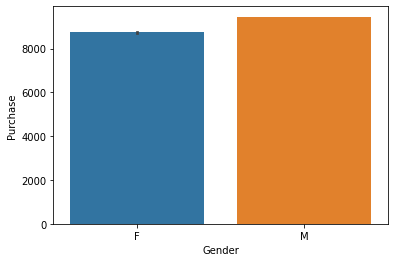

In [7]:
sns.barplot(data = df, x = "Gender", y = "Purchase")

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

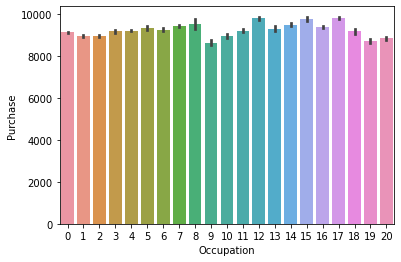

In [8]:
sns.barplot(data = df, x = "Occupation", y = "Purchase")

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

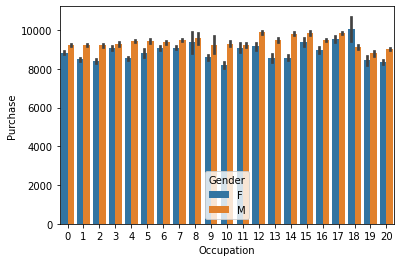

In [9]:
sns.barplot(data = df, x = "Occupation", y = "Purchase", hue = "Gender")

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

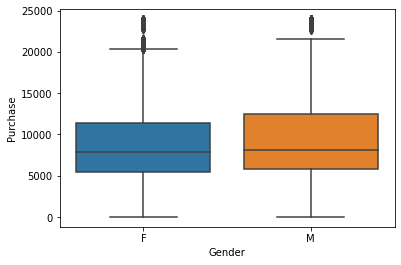

In [10]:
sns.boxplot(data = df, x = "Gender", y = "Purchase")

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

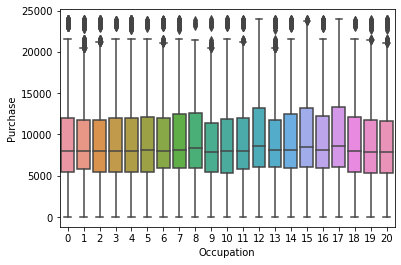

In [11]:
sns.boxplot(data = df, x = "Occupation", y = "Purchase")

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

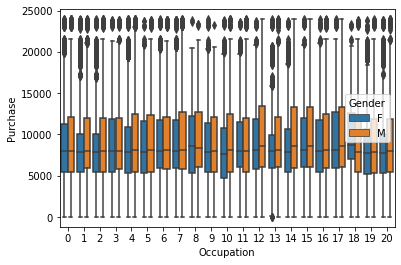

In [12]:
sns.boxplot(data = df, x = "Occupation", y = "Purchase", hue = "Gender")

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

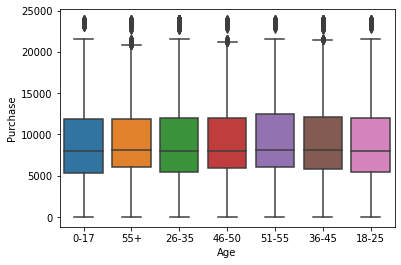

In [13]:
sns.boxplot(data = df, x = "Age", y = "Purchase")

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

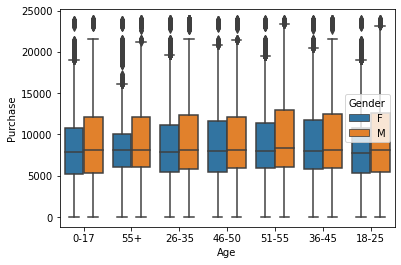

In [14]:
sns.boxplot(data = df, x = "Age", y = "Purchase", hue = "Gender")

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

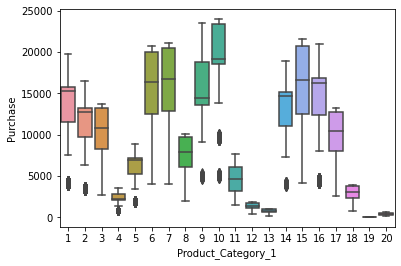

In [15]:
sns.boxplot(data = df, x = "Product_Category_1", y = "Purchase")

In [16]:
df["Product_ID"] = df["Product_ID"].str.replace("P00","")
scaler = StandardScaler()
df["Product_ID"] = scaler.fit_transform(df["Product_ID"].values.reshape(-1, 1))

df = df.drop(["Product_Category_3"], axis = 1)

df.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,-1.028774,F,0-17,10,A,2,0,3,NaN,8370
1,1000001,0.722139,F,0-17,10,A,2,0,1,6.0,15200
2,1000001,-0.845799,F,0-17,10,A,2,0,12,NaN,1422
3,1000001,-0.869157,F,0-17,10,A,2,0,12,14.0,1057
4,1000002,1.077382,M,55+,16,C,4+,0,8,NaN,7969


In [17]:
df["Product_Category_2"] = df["Product_Category_2"].fillna(df["Product_Category_2"].mean())
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

In [18]:
encode_columns = ["Gender", "Age", "City_Category"]
lencoder = LabelEncoder()
for i in encode_columns:
    df[i] = lencoder.fit_transform(df[i])

df["Stay_In_Current_City_Years"] = df["Stay_In_Current_City_Years"].replace("4+","4")
df["Stay_In_Current_City_Years"] = df["Stay_In_Current_City_Years"].astype(int)

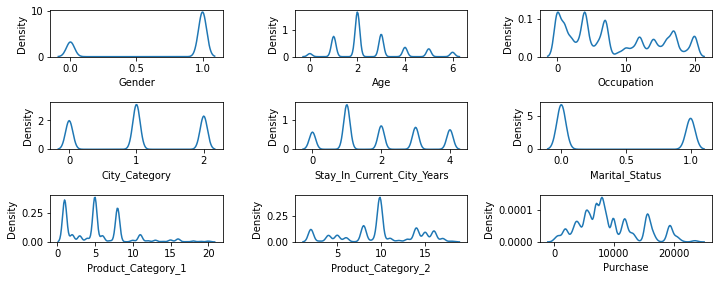

In [19]:
rows = 3
columns = 3
figure, ax = plt.subplots(nrows = rows, ncols = columns, figsize = (10,4))
col = df.columns
index = 2

for i in range(rows):
    for j in range(columns):
        sns.kdeplot(df[col[index]], ax = ax[i][j])
        index = index + 1

plt.tight_layout()

In [20]:
df["Purchase"] = np.log(df["Purchase"])


In [21]:
#doesnt work accurately yet...
df = pd.get_dummies(df)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,-1.028774,0,0,10,0,2,0,3,9.842329,9.032409
1,1000001,0.722139,0,0,10,0,2,0,1,6.000000,9.629051
2,1000001,-0.845799,0,0,10,0,2,0,12,9.842329,7.259820
3,1000001,-0.869157,0,0,10,0,2,0,12,14.000000,6.963190
4,1000002,1.077382,1,6,16,2,4,0,8,9.842329,8.983314


In [22]:
X = df.drop(labels = ["Purchase"], axis = 1)
Y = df["Purchase"]

X.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
0,1000001,-1.028774,0,0,10,0,2,0,3,9.842329
1,1000001,0.722139,0,0,10,0,2,0,1,6.000000
2,1000001,-0.845799,0,0,10,0,2,0,12,9.842329
3,1000001,-0.869157,0,0,10,0,2,0,12,14.000000
4,1000002,1.077382,1,6,16,2,4,0,8,9.842329


In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.25, random_state=0)

In [24]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [25]:
LinReg = LinearRegression()
LinReg.fit(X_train, Y_train)

LinearRegression()

In [26]:
predictions = LinReg.predict(X_test)

r2 = r2_score(Y_test, predictions)
mae = mean_absolute_error(Y_test, predictions)
mse = mean_squared_error(Y_test, predictions)
rmse = np.sqrt(mse)

print("R2 Score: ", r2)
print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)


R2 Score:  0.19843657211872356
Mean Absolute Error:  0.4555222265795643
Mean Squared Error:  0.4412211136403727
Root Mean Squared Error:  0.6642447693737398


In [27]:
DecTree = DecisionTreeRegressor(max_depth = 7)
DecTree.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=7)

In [28]:
predictions = DecTree.predict(X_test)
 
print("R2 Score: ", r2_score(Y_test, predictions))
print("Mean Absolute Error: ", mean_absolute_error(Y_test, predictions))
print("Mean Squared Error: ", mean_squared_error(Y_test, predictions))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(Y_test, predictions)))

R2 Score:  0.7441915450324541
Mean Absolute Error:  0.28014135370434845
Mean Squared Error:  0.14080993150815407
Root Mean Squared Error:  0.37524649433159807


In [31]:
Rmf = RandomForestRegressor()
Rmf.fit(X_train, Y_train)

predictions = Rmf.predict(X_test)

r2 = r2_score(Y_test, predictions)
mae = mean_absolute_error(Y_test, predictions)
mse = mean_squared_error(Y_test, predictions)
rmse = np.sqrt(mse)

print("R2 Score: ", r2)
print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)


R2 Score:  0.7767824495881902
Mean Absolute Error:  0.260198268079736
Mean Squared Error:  0.12287024675901546
Root Mean Squared Error:  0.3505285248863714


In [33]:
df_test = pd.read_csv("test.csv")
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [34]:
df_test.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [36]:
df_test["Product_ID"] = df_test["Product_ID"].str.replace("P00","")
scaler = StandardScaler()
df_test["Product_ID"] = scaler.fit_transform(df_test["Product_ID"].values.reshape(-1, 1))

df_test= df_test.drop(["Product_Category_3"], axis = 1)

df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
0,1000004,-0.434752,M,46-50,7,B,2,1,1,11.0
1,1000009,-0.587188,M,26-35,17,C,0,0,3,5.0
2,1000010,1.133865,F,36-45,1,B,4+,1,5,14.0
3,1000010,-0.273465,F,36-45,1,B,4+,1,4,9.0
4,1000011,-1.173330,F,26-35,1,C,1,0,4,5.0


In [37]:
df_test["Product_Category_2"] = df_test["Product_Category_2"].fillna(df_test["Product_Category_2"].mean())
df_test.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
dtype: int64

In [38]:
encode_columns = ["Gender", "Age", "City_Category"]
lencoder = LabelEncoder()
for i in encode_columns:
    df_test[i] = lencoder.fit_transform(df_test[i])

df_test["Stay_In_Current_City_Years"] = df_test["Stay_In_Current_City_Years"].replace("4+","4")
df_test["Stay_In_Current_City_Years"] = df_test["Stay_In_Current_City_Years"].astype(int)

In [40]:
df.shape

(550068, 11)

In [41]:
df_test.shape

(233599, 10)

In [43]:
final_predictions = Rmf.predict(df_test.values)
final_predictions.shape

(233599,)

In [48]:
frame = pd.read_csv("test.csv")
ID_info = frame[["User_ID", "Product_ID"]]
ID_info.head()

,User_ID,Product_ID
0,1000004,P00128942
1,1000009,P00113442
2,1000010,P00288442
3,1000010,P00145342
4,1000011,P00053842


In [49]:
predicted = pd.DataFrame(final_predictions, columns = ["Purchase"])
predicted["User_ID"] = ID_info["User_ID"]
predicted["Product_ID"] = ID_info["Product_ID"]
predicted.head()

,Purchase,User_ID,Product_ID
0,9.800652,1000004,P00128942
1,9.457105,1000009,P00113442
2,4.682356,1000010,P00288442
3,4.682356,1000010,P00145342
4,4.753159,1000011,P00053842


In [50]:
predicted.to_csv("BlackFridaySale.csv", index = False)